# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import requests
import json
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
i = 0
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print('Beginning Data Retrieva\n------------------')

for city in cities:
    
    url = f' http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial'
    
    print(f'Prossessing Record {i} on Set 1 | {city}')
    
    i+=1
          
    try:
          
        json = requests.get(url).json()
        
        Lat.append(json['coord']['lat'])
        Lng.append(json['coord']['lon'])
        Max_Temp.append(json['main']['temp_max'])
        Humidity.append(json['main']['humidity'])
        Cloudiness.append(json["clouds"]["all"])
        Wind_Speed.append(json["wind"]["speed"])
        Country.append(json['sys']['country'])
        Date.append(json['dt'])
        City.append(city)
          
    except KeyError:
          
        print(f'{city} not found. Skipping...')
          
print('\n------------------\nData Retrieval Complete \n------------------')

Beginning Data Retrieva
------------------
Prossessing Record 0 on Set 1 | puerto ayora
Prossessing Record 1 on Set 1 | hilo
Prossessing Record 2 on Set 1 | new norfolk
Prossessing Record 3 on Set 1 | catamarca
Prossessing Record 4 on Set 1 | avarua
Prossessing Record 5 on Set 1 | punta arenas
Prossessing Record 6 on Set 1 | coquimbo
Prossessing Record 7 on Set 1 | saint-philippe
Prossessing Record 8 on Set 1 | yellowknife
Prossessing Record 9 on Set 1 | port alfred
Prossessing Record 10 on Set 1 | atuona
Prossessing Record 11 on Set 1 | nanortalik
Prossessing Record 12 on Set 1 | warragul
Prossessing Record 13 on Set 1 | saldanha
Prossessing Record 14 on Set 1 | lagunas
Prossessing Record 15 on Set 1 | vaini
Prossessing Record 16 on Set 1 | hamilton
Prossessing Record 17 on Set 1 | jamestown
Prossessing Record 18 on Set 1 | tasiilaq
Prossessing Record 19 on Set 1 | lebu
Prossessing Record 20 on Set 1 | thilogne
thilogne not found. Skipping...
Prossessing Record 21 on Set 1 | airai
Pro

Prossessing Record 178 on Set 1 | luau
Prossessing Record 179 on Set 1 | sabang
Prossessing Record 180 on Set 1 | san jeronimo
Prossessing Record 181 on Set 1 | uyo
Prossessing Record 182 on Set 1 | betare oya
Prossessing Record 183 on Set 1 | morgan city
Prossessing Record 184 on Set 1 | sandwick
Prossessing Record 185 on Set 1 | faya
Prossessing Record 186 on Set 1 | flinders
Prossessing Record 187 on Set 1 | omboue
Prossessing Record 188 on Set 1 | zlobin
Prossessing Record 189 on Set 1 | lucea
Prossessing Record 190 on Set 1 | pemba
Prossessing Record 191 on Set 1 | moranbah
Prossessing Record 192 on Set 1 | zhigansk
Prossessing Record 193 on Set 1 | kodiak
Prossessing Record 194 on Set 1 | barentsburg
barentsburg not found. Skipping...
Prossessing Record 195 on Set 1 | tuktoyaktuk
Prossessing Record 196 on Set 1 | pervomayskoye
Prossessing Record 197 on Set 1 | angoram
Prossessing Record 198 on Set 1 | poum
Prossessing Record 199 on Set 1 | chuy
Prossessing Record 200 on Set 1 | b

Prossessing Record 354 on Set 1 | kirkwall
Prossessing Record 355 on Set 1 | nuuk
Prossessing Record 356 on Set 1 | glenwood springs
Prossessing Record 357 on Set 1 | ponta pora
Prossessing Record 358 on Set 1 | kandrian
Prossessing Record 359 on Set 1 | viedma
Prossessing Record 360 on Set 1 | bushehr
Prossessing Record 361 on Set 1 | aksay
Prossessing Record 362 on Set 1 | alta floresta
Prossessing Record 363 on Set 1 | qaqortoq
Prossessing Record 364 on Set 1 | sofiyivka
Prossessing Record 365 on Set 1 | erzin
Prossessing Record 366 on Set 1 | monrovia
Prossessing Record 367 on Set 1 | attawapiskat
attawapiskat not found. Skipping...
Prossessing Record 368 on Set 1 | marsh harbour
Prossessing Record 369 on Set 1 | lorengau
Prossessing Record 370 on Set 1 | liyang
Prossessing Record 371 on Set 1 | manavalakurichi
Prossessing Record 372 on Set 1 | tocopilla
Prossessing Record 373 on Set 1 | meulaboh
Prossessing Record 374 on Set 1 | sao filipe
Prossessing Record 375 on Set 1 | victor 

Prossessing Record 532 on Set 1 | the pas
Prossessing Record 533 on Set 1 | aloleng
Prossessing Record 534 on Set 1 | vostok
Prossessing Record 535 on Set 1 | kayerkan
Prossessing Record 536 on Set 1 | maneadero
Prossessing Record 537 on Set 1 | caramay
Prossessing Record 538 on Set 1 | hobyo
Prossessing Record 539 on Set 1 | chapais
Prossessing Record 540 on Set 1 | beruni
beruni not found. Skipping...
Prossessing Record 541 on Set 1 | komsomolskiy
Prossessing Record 542 on Set 1 | saraland
Prossessing Record 543 on Set 1 | maceio
Prossessing Record 544 on Set 1 | tucano
Prossessing Record 545 on Set 1 | guararapes
Prossessing Record 546 on Set 1 | barra do garcas
Prossessing Record 547 on Set 1 | japura
Prossessing Record 548 on Set 1 | aksarka
Prossessing Record 549 on Set 1 | meghri
Prossessing Record 550 on Set 1 | margate
Prossessing Record 551 on Set 1 | risor
Prossessing Record 552 on Set 1 | wabrzezno
Prossessing Record 553 on Set 1 | zachagansk
zachagansk not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
my_df = pd.DataFrame({
                        'City':City,
                        'Lat':Lat,
                        'Lng':Lng,
                        'Max_Temp':Max_Temp,
                        'Humidity':Humidity,
                        'Cloudiness':Cloudiness,
                        'Wind Speed':Wind_Speed,
                        'Country':Country,
                        'Date':Date
                        })
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        577 non-null    object 
 1   Lat         577 non-null    float64
 2   Lng         577 non-null    float64
 3   Max_Temp    577 non-null    float64
 4   Humidity    577 non-null    int64  
 5   Cloudiness  577 non-null    int64  
 6   Wind Speed  577 non-null    float64
 7   Country     577 non-null    object 
 8   Date        577 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.7+ KB


In [18]:
my_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,70.00,90,86,4.00,EC,1604204687
1,hilo,19.73,-155.09,82.40,65,90,5.82,US,1604204565
2,new norfolk,-42.78,147.06,62.01,52,95,1.01,AU,1604204688
3,catamarca,-28.47,-65.79,48.99,66,4,1.01,AR,1604204442
4,avarua,-21.21,-159.78,75.20,83,100,10.29,CK,1604204688


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
LessHumid_df = my_df[(my_df.Humidity < 100)]
LessHumid_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.521726,16.481548,58.844893,72.208185,49.080071,8.040534,1.604205e+09
std,33.279704,92.134770,22.289512,20.663704,40.480567,5.511000,8.584792e+01
min,-54.800000,-175.200000,-9.040000,11.000000,0.000000,0.310000,1.604204e+09
25%,-8.885000,-64.065000,45.782500,62.000000,2.000000,3.665000,1.604205e+09
50%,20.510000,18.685000,62.800000,77.000000,44.000000,6.870000,1.604205e+09
75%,46.407500,100.347500,77.000000,88.000000,90.000000,11.285000,1.604205e+09
max,78.220000,178.420000,102.200000,99.000000,100.000000,29.330000,1.604205e+09


In [20]:
# Save to CSV 
LessHumid = LessHumid_df.to_csv('LessHumid.csv', index=False)


In [21]:
LessHumid_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,70.00,90,86,4.00,EC,1604204687
1,hilo,19.73,-155.09,82.40,65,90,5.82,US,1604204565
2,new norfolk,-42.78,147.06,62.01,52,95,1.01,AU,1604204688
3,catamarca,-28.47,-65.79,48.99,66,4,1.01,AR,1604204442
4,avarua,-21.21,-159.78,75.20,83,100,10.29,CK,1604204688


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

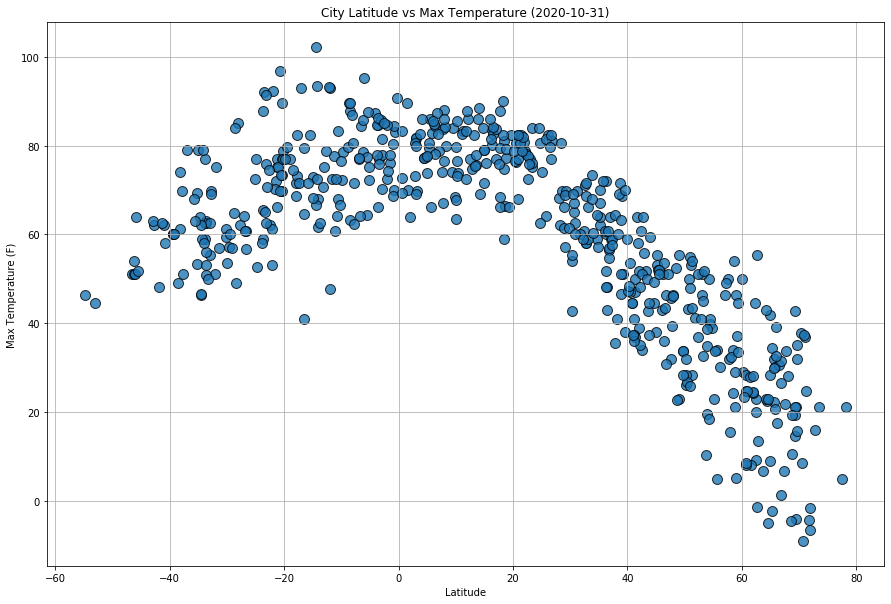

<Figure size 432x288 with 0 Axes>

In [22]:
chart_title = "City Latitude vs Max Temperature (" + str(datetime.datetime.now().date()) + ")"
LessHumid_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 99, grid=True, 
              figsize=(15,10), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show()
plt.savefig(chart_title + '.jpg')

## Latitude vs. Humidity Plot

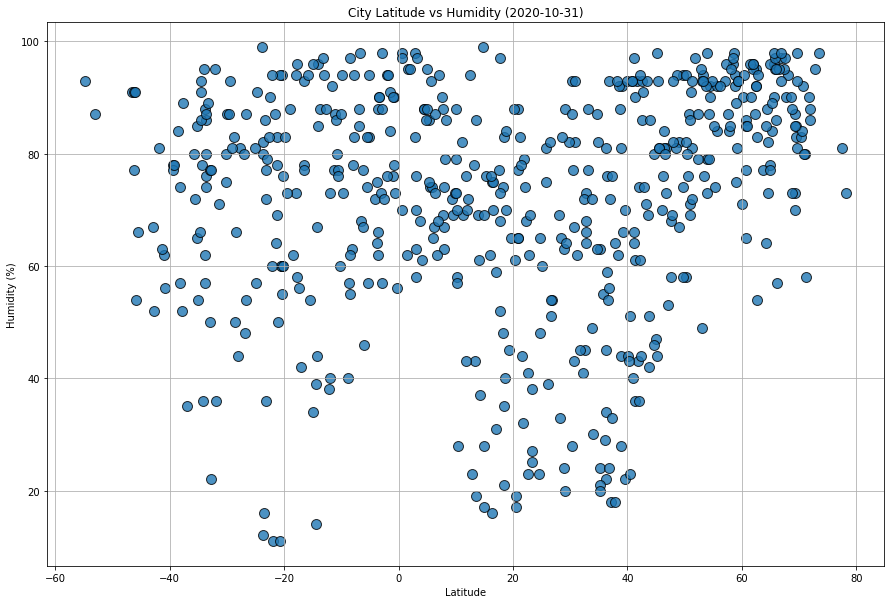

<Figure size 432x288 with 0 Axes>

In [23]:
chart_title = "City Latitude vs Humidity (" + str(datetime.datetime.now().date()) + ")"
LessHumid_df.plot(kind="scatter", x="Lat", y="Humidity",s = 99, grid=True, 
              figsize=(15,10), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
plt.savefig(chart_title + '.jpg')

## Latitude vs. Cloudiness Plot

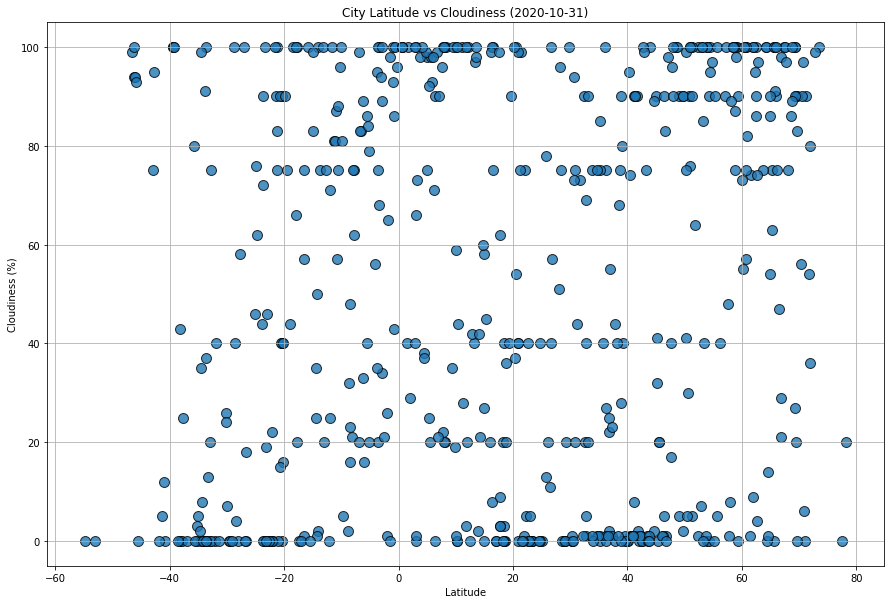

<Figure size 432x288 with 0 Axes>

In [24]:
chart_title = "City Latitude vs Cloudiness (" + str(datetime.datetime.now().date()) + ")"
LessHumid_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 99, grid=True, 
              figsize=(15,10), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()
plt.savefig(chart_title + '.jpg')

## Latitude vs. Wind Speed Plot

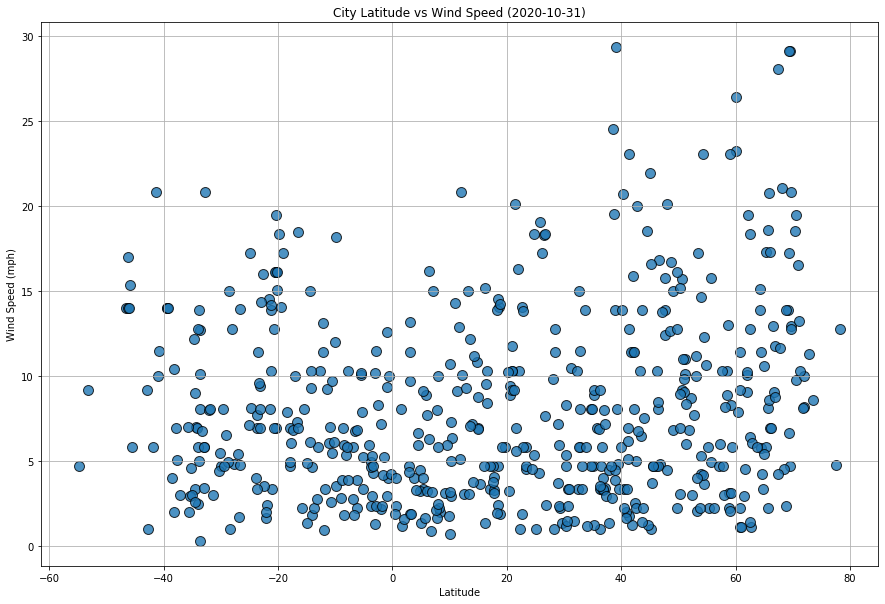

<Figure size 432x288 with 0 Axes>

In [25]:
chart_title = "City Latitude vs Wind Speed (" + str(datetime.datetime.now().date()) + ")"
LessHumid_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 99, grid=True, 
              figsize=(15,10), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()
plt.savefig(chart_title + '.jpg')

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots

In [27]:
# Create Northern and Southern Hemisphere DataFrames
NorthHem_df = LessHumid_df[(LessHumid_df.Lat < 0)]
NorthHem_df.head()


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,70.00,90,86,4.00,EC,1604204687
2,new norfolk,-42.78,147.06,62.01,52,95,1.01,AU,1604204688
3,catamarca,-28.47,-65.79,48.99,66,4,1.01,AR,1604204442
4,avarua,-21.21,-159.78,75.20,83,100,10.29,CK,1604204688
5,punta arenas,-53.15,-70.92,44.60,87,0,9.17,CL,1604204688


In [28]:
SouthHem_df = LessHumid_df[(LessHumid_df.Lat > 0)]
SouthHem_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hilo,19.73,-155.09,82.40,65,90,5.82,US,1604204565
8,yellowknife,62.46,-114.35,23.00,92,90,12.75,CA,1604204521
11,nanortalik,60.14,-45.24,29.10,90,55,23.24,GL,1604204690
16,hamilton,39.18,-84.53,51.01,66,40,8.05,US,1604204540
17,jamestown,42.10,-79.24,39.00,74,1,11.41,US,1604204437


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

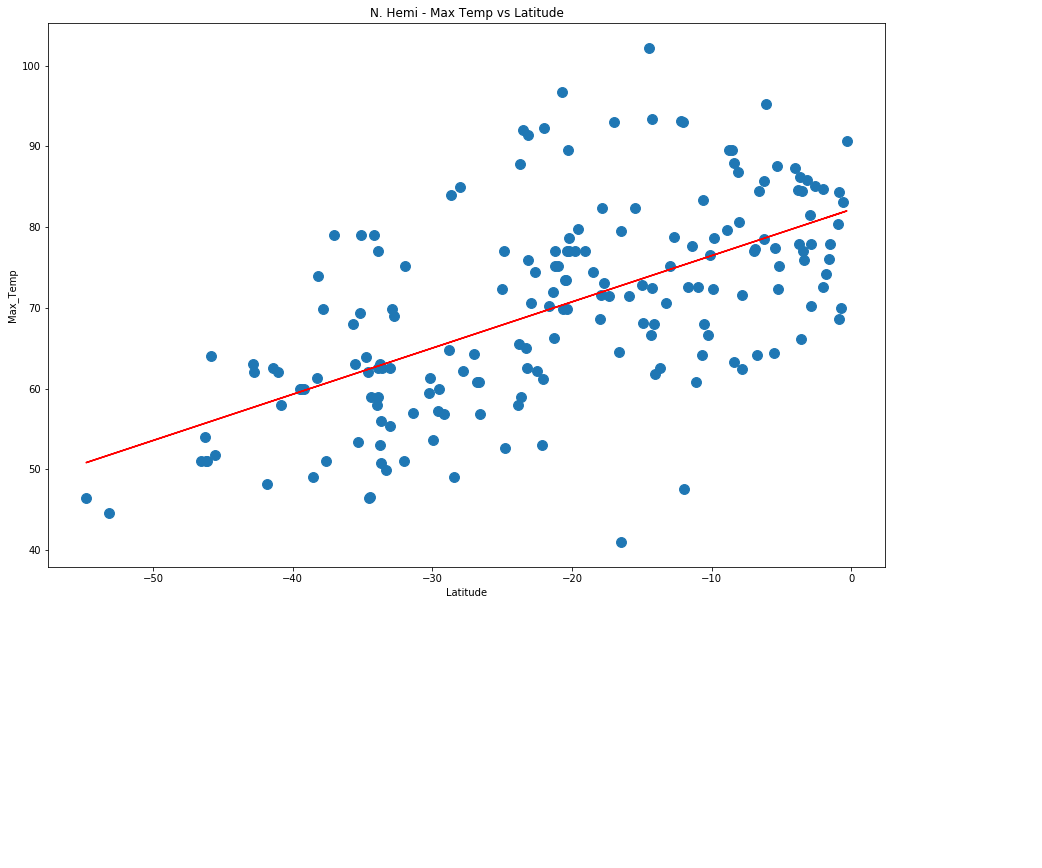

In [29]:
chart_title = 'N. Hemi - Max Temp vs Latitude'

x = NorthHem_df.Lat
y = NorthHem_df.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

NorthHem_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(2,2), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max_Temp')

plt.savefig(chart_title + '.jpg')
    



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

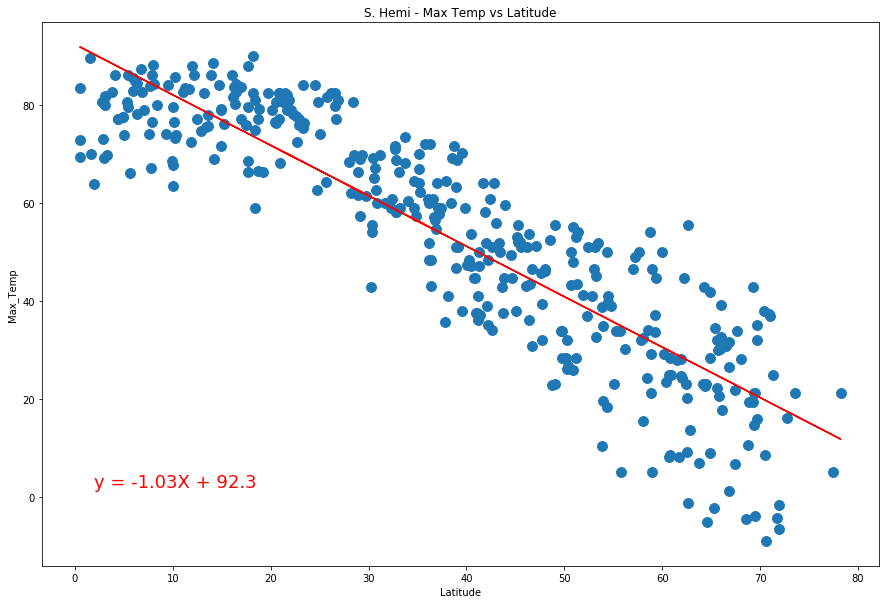

In [30]:
chart_title = 'S. Hemi - Max Temp vs Latitude'

x = SouthHem_df.Lat
y = SouthHem_df.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

SouthHem_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(2,2), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max_Temp')

plt.savefig(chart_title + '.jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

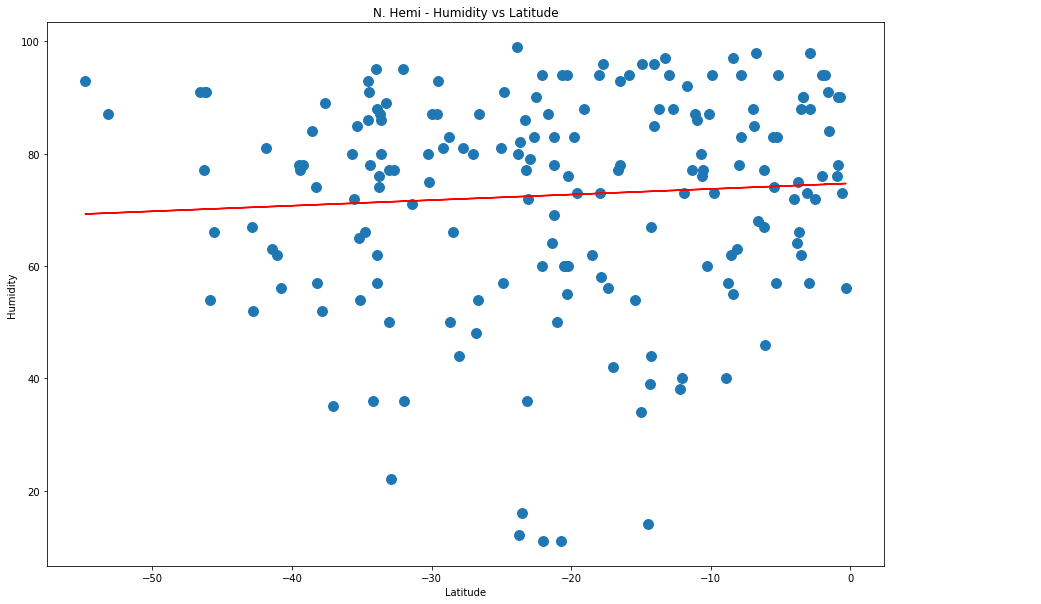

In [31]:
chart_title = 'N. Hemi - Humidity vs Latitude'

x = NorthHem_df.Lat
y = NorthHem_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

NorthHem_df.plot(kind="scatter", x="Lat", y="Humidity",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(2,2), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig(chart_title + '.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

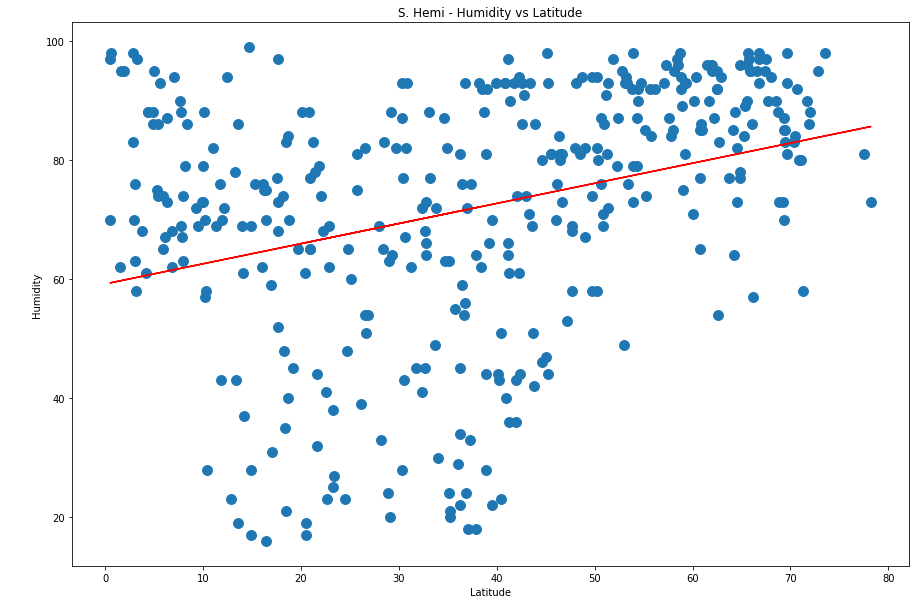

In [32]:
chart_title = 'S. Hemi - Humidity vs Latitude'

x = SouthHem_df.Lat
y = SouthHem_df.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

SouthHem_df.plot(kind="scatter", x="Lat", y="Humidity",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(-10,10), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig(chart_title + '.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

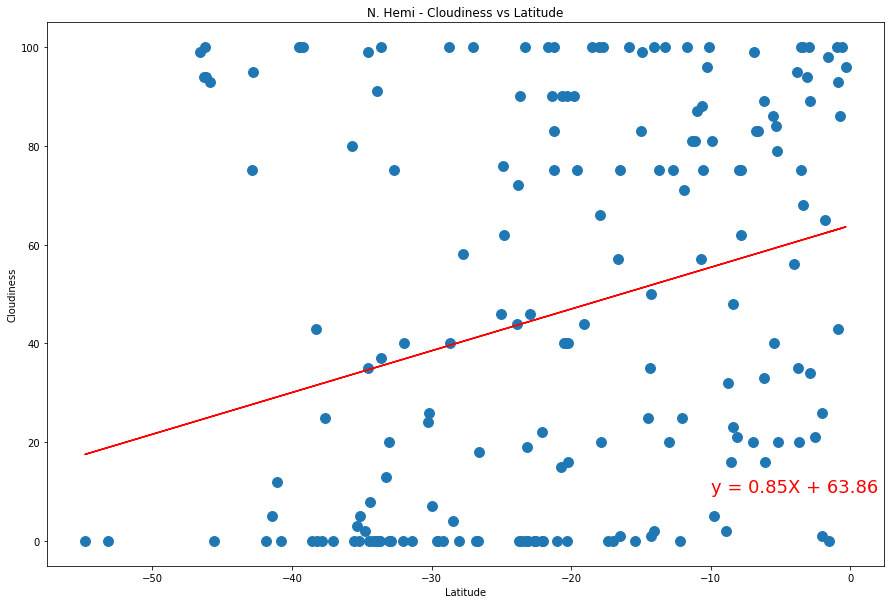

In [33]:
chart_title = 'N. Hemi - Cloudiness vs Latitude'

x = NorthHem_df.Lat
y = NorthHem_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

NorthHem_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(-10,10), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig(chart_title + '.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

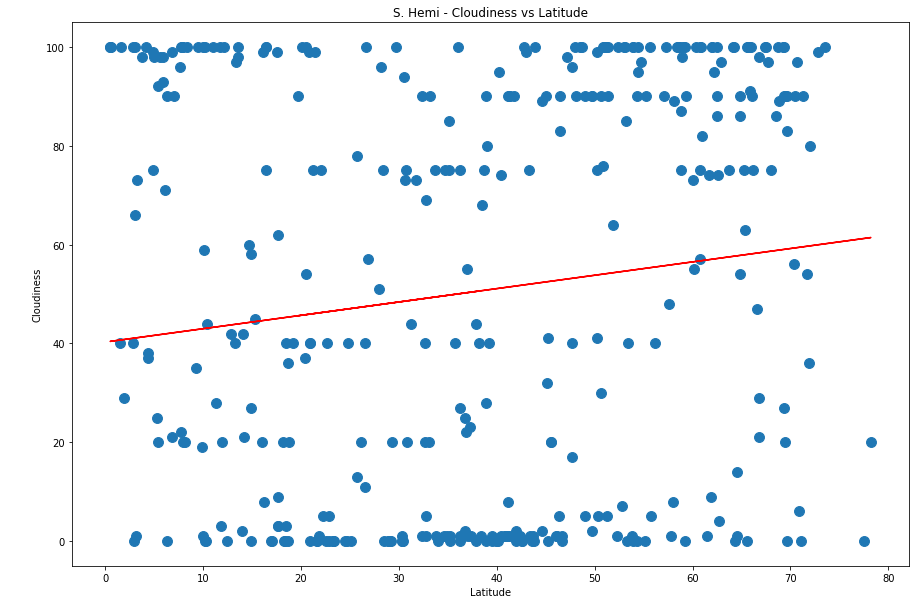

In [34]:
chart_title = 'S. Hemi - Cloudiness vs Latitude'

x = SouthHem_df.Lat
y = SouthHem_df.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

SouthHem_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(-10,10), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig(chart_title + '.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

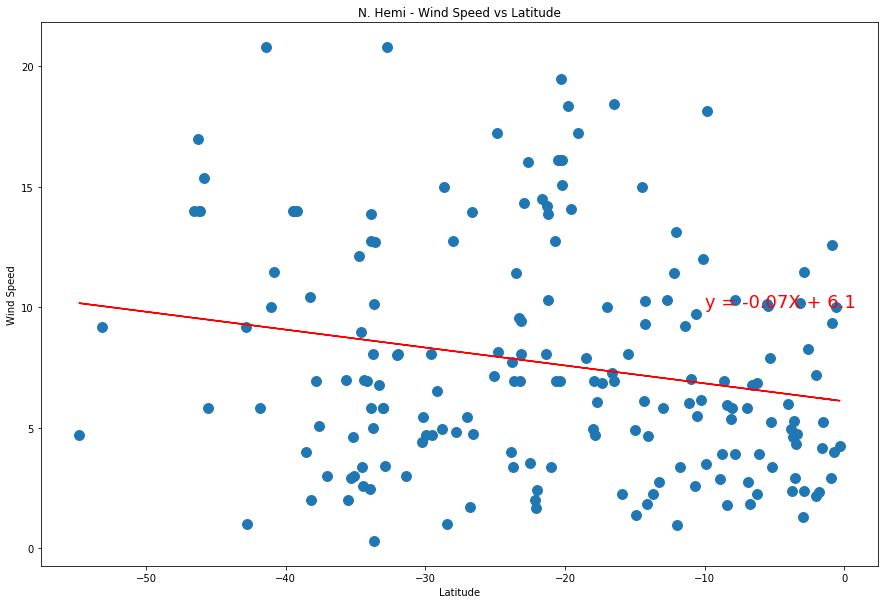

In [35]:
chart_title = 'N. Hemi - Wind Speed vs Latitude'

x = NorthHem_df.Lat
y = NorthHem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

NorthHem_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(-10,10), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig(chart_title + '.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

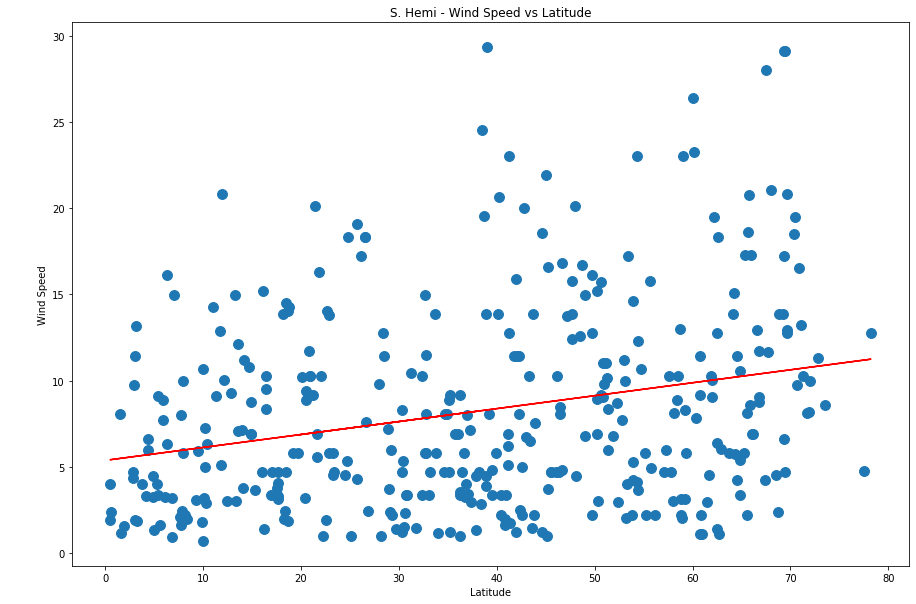

In [36]:
chart_title = 'S. Hemi - Wind Speed vs Latitude'

x = SouthHem_df.Lat
y = SouthHem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

SouthHem_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 98, grid=False, 
              figsize=(15,10), title = chart_title)


plt.plot(x, regress_values,"red")

eqn = f'y = {str(round(slope,2))}X + {str(round(intercept,2))}'
plt.annotate(eqn ,(-10,10), fontsize=18,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig(chart_title + '.jpg')